In [1]:
#! conda install -c conda-forge geocoder

!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: done

# All requested packages already installed.

Folium installed and imported!


In [2]:
riyadh_map = folium.Map(location=[24.722172, 46.710911], zoom_start=10)

# display world map
riyadh_map

In [3]:
CLIENT_ID = 'GEVDISZ1YEOIUSGDS5XOHPUDIOCMQHJH4O2303UXJU5MG4KL' # your Foursquare ID
CLIENT_SECRET = '3VZXV1MATDGR4MEHO03LA1F3JMUR05XGFT11SSMHEFVIVZ20' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GEVDISZ1YEOIUSGDS5XOHPUDIOCMQHJH4O2303UXJU5MG4KL
CLIENT_SECRET:3VZXV1MATDGR4MEHO03LA1F3JMUR05XGFT11SSMHEFVIVZ20


In [4]:
radius = 1500
LIMIT = 300
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    24.841237,
    46.671741,
    radius, 
    LIMIT)

In [43]:

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe



In [6]:
results = requests.get(url).json()['response']['totalResults']

In [7]:
results


64

In [8]:
#results

In [9]:
#results['response']['groups'][0]['items'][0]['venue']

In [10]:
riyadh_map = folium.Map(location=[24.722172, 46.710911], zoom_start=10)

# display world map
riyadh_map
incidents = folium.map.FeatureGroup()
locations1 = []
x = 24.90
for i in range(44):
    y = 46.95
    for j in range(47):
        locations1.append((x, y))
        incidents.add_child(
            folium.features.Circle(location=[x, y], radius = 1, color='black', popup=None, tooltip=None)
        )
        y = y - 0.01
    x = x - 0.01
       


In [11]:
riyadh_map.add_child(incidents)

In [12]:
import pandas as pd

In [13]:
radius = 1650
LIMIT = 300
i = 0
#loc1 = []
COLUMN_NAMES = ['lng', 'lat', 'total_venues']
df = pd.DataFrame(columns = COLUMN_NAMES)

while i < len(locations1) :
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        locations1[i][0],
        locations1[i][1],
        radius,
        LIMIT)
    try :
        results = requests.get(url).json()['response']['totalResults']
        df.loc[i] = [locations1[i][0], locations1[i][1],  results]
        
    except:
        print('exption' + str(i))
        #print(locations1[i])
    i += 1



exption1341


In [14]:
df.head()

,lng,lat,total_venues
0,24.9,46.95,3.0
1,24.9,46.94,4.0
2,24.9,46.93,7.0
3,24.9,46.92,16.0
4,24.9,46.91,10.0


In [15]:
boxplot = df.boxplot(column=['total_venues'])

In [16]:
df1 = df[df['total_venues'] < 180]
df1 = df1[df1['total_venues'] > 40]

In [44]:
riyadh_map = folium.Map(location=[24.722172, 46.710911], zoom_start=10)


incidents = folium.map.FeatureGroup()
for row in df1.iterrows():
    incidents.add_child(
        folium.features.Circle(location=[row[1]['lng'], row[1]['lat']], radius = 10, color='black', popup=None, tooltip=None)
        )


riyadh_map.add_child(incidents)

In [18]:
radius = 1500
LIMIT = 300
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&intent={}&radius={}&limit={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    24.744653, 
    46.846132,
    'browse',
    radius, 
    LIMIT,
    '4bf58dd8d48988d1e0931735')

In [19]:
results = requests.get(url).json()

In [20]:
for i in range(len(results['response']['venues'])):
    print(results['response']['venues'][i]['name'])
               

Moroccan Taste (المذاق المغربي)
Arabic Coffee Shop (نسناس النسيم)
Cactus cafe
dr.CAFE COFFEE | د. كيف
Pretzel Maker
Knoll Coffee Roasters
Knoll Coffee Roaster
بريتزل ميكر
dr.CAFE (د.كيف)
Java Cafe, King Abdulaziz Medical City
ملاذ المبزوطين للقهوة والشاي
Coffee Flavor
dr.CAFE COFFEE (د. كيف)
Dr. cafe OR
Sweetest Karak (sweetest karak)


In [21]:
columns_names = ['lng', 'lat', 'total_venues', 'coffe_total']

df_coffe = pd.DataFrame(columns =  columns_names)


    

In [22]:
df_coffe

,lng,lat,total_venues,coffe_total


In [23]:
radius = 1500
LIMIT = 300
intent = 'browse'
j = 0
for row in df1.iterrows():
    url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&intent={}&radius={}&limit={}&categoryId={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        row[1]['lng'],
        row[1]['lat'],
        intent,
        radius, 
        LIMIT,
        '4bf58dd8d48988d1e0931735')
    try:
        results = requests.get(url).json()
        df_coffe.loc[j] = [row[1]['lng'], row[1]['lat'], row[1]['total_venues'], len(results['response']['venues'])]
        j += 1
    except :
        print(row)
        
    



In [24]:
df_coffe.tail(15)

,lng,lat,total_venues,coffe_total
529,24.55,46.71,67.0,12.0
530,24.55,46.70,76.0,15.0
531,24.55,46.69,62.0,10.0
532,24.55,46.68,59.0,3.0
533,24.55,46.67,41.0,1.0
534,24.55,46.66,76.0,4.0
535,24.55,46.65,77.0,4.0
536,24.55,46.64,51.0,7.0
537,24.54,46.70,85.0,14.0
538,24.54,46.69,66.0,11.0


In [25]:
#df.loc[i] = [locations1[i][0], locations1[i][1],  results]

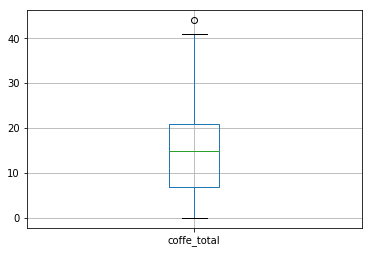

In [26]:
boxplot = df_coffe.boxplot(column=['coffe_total'])

In [27]:
df_coffe.shape

(544, 4)

In [28]:
df1.shape

(544, 3)

In [29]:
df_coffe.head()

,lng,lat,total_venues,coffe_total
0,24.88,46.70,43.0,8.0
1,24.88,46.62,44.0,1.0
2,24.88,46.61,53.0,3.0
3,24.88,46.60,48.0,6.0
4,24.87,46.83,43.0,3.0


In [30]:
riyadh_map = folium.Map(location=[24.722172, 46.710911], zoom_start=10)


incidents = folium.map.FeatureGroup()
for row in df_coffe.iterrows():
    if row[1]['coffe_total'] <= 5: 
        incidents.add_child(
            folium.features.Circle(location=[row[1]['lng'], row[1]['lat']], radius = 10, color='black', popup=None, tooltip=None)
            )


riyadh_map.add_child(incidents)

In [31]:
columns_names = ['lng', 'lat', 'total_venues', 'coffe_total', 'ratio']
df_0coffe = pd.DataFrame(columns =  ['lng', 'lat', 'total_venues', 'coffe_total'])
df_coffe1 = pd.DataFrame(columns =  columns_names)
    
j=0
for row in df_coffe.iterrows():
    if row[1]['coffe_total'] == 0:
        df_0coffe.loc[j] = [row[1]['lng'], row[1]['lat'], row[1]['total_venues'], 
                        row[1]['coffe_total']]
    else :
        df_coffe1.loc[j] = [row[1]['lng'], row[1]['lat'], row[1]['total_venues'], 
                            row[1]['coffe_total'], row[1]['total_venues']/row[1]['coffe_total']]
    j += 1


In [32]:
df_coffe1.describe()

,lng,lat,total_venues,coffe_total,ratio
count,542.000000,542.000000,542.000000,542.000000,542.000000
mean,24.717177,46.704299,90.049815,15.280443,8.524272
std,0.093607,0.079375,37.275654,9.238809,7.695965
min,24.530000,46.540000,41.000000,1.000000,1.484848
25%,24.640000,46.640000,59.000000,8.000000,4.700000
50%,24.720000,46.710000,81.000000,15.000000,6.637500
75%,24.800000,46.770000,115.750000,21.000000,9.586364
max,24.880000,46.870000,179.000000,44.000000,85.000000


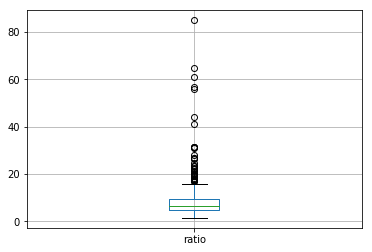

In [33]:
boxplot = df_coffe1.boxplot(column=['ratio'])

In [34]:
df_coffe1 = df_coffe1[df_coffe1['ratio'] > 7]

In [45]:
riyadh_map = folium.Map(location=[24.722172, 46.710911], zoom_start=10)


incidents = folium.map.FeatureGroup()
for row in df_coffe1.iterrows():
    incidents.add_child(
        folium.features.Circle(location=[row[1]['lng'], row[1]['lat']], radius = 10, color='black', popup=None, tooltip=None)
        )


riyadh_map.add_child(incidents)

In [46]:
riyadh_map.add_child(incidents)

In [36]:
df_coffe1.max(axis=None, skipna=None, level=None, numeric_only=None)

lng              24.88
lat              46.87
total_venues    179.00
coffe_total      25.00
ratio            85.00
dtype: float64

In [37]:
df_gr30 = df_coffe1[df_coffe1['ratio'] > 15]

In [38]:
riyadh_map = folium.Map(location=[24.722172, 46.710911], zoom_start=10)


incidents = folium.map.FeatureGroup()
for row in df_gr30.iterrows():
    incidents.add_child(
        folium.features.Circle(location=[row[1]['lng'], row[1]['lat']], radius = 10, color='black', popup=None, tooltip=None)
        )


riyadh_map.add_child(incidents)

In [39]:
radius = 500
LIMIT = 300
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    40.727887, 
    -73.996613,
    radius, 
    LIMIT)

In [40]:
results = requests.get(url).json()['response']['totalResults']

In [41]:
results

237

In [42]:


radius = 500
LIMIT = 300
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    24.698563, 
    46.685646,
    radius, 
    LIMIT)
results = requests.get(url).json()['response']['totalResults']
results

97